In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Data Preprocessing
    Missing values check
    Convert categorical columns into numeric (encoding)
    Normalize numerical features

In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
df=df.replace(['No internet Service','No Phone Service'],'No')

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)

In [7]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  StreamingTV_Ye

## Train-Test-Split

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop("Churn_Yes",axis=1)
y = df["Churn_Yes"]

In [ ]:
categorical = X.select_dtypes(include=["object"]).columns
numerical = X.select_dtypes(exclude=["object"]).columns

In [12]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Build Models

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [14]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

C:\Users\vrushti.sheth\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7892122072391767
[[910 125]
 [172 202]]
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1035
        True       0.62      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



# ROC Curve + AUC

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

In [19]:
y_prob=model.predict_proba(X_test)[:,1]

In [20]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob)

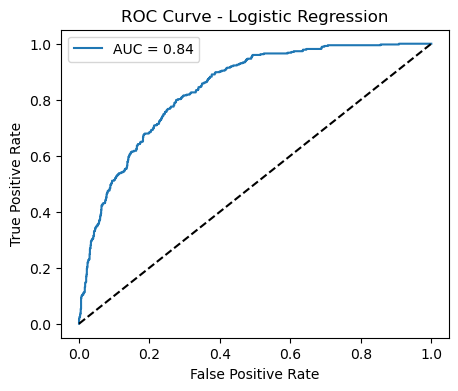

In [23]:
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Feature importance(Coefficients)

In [24]:
import numpy as np

In [26]:
importance=model.coef_[0]
features=X_train.columns

In [27]:
coef_df=pd.DataFrame({"Feature":features,"Coefficient":importance})
coef_df["AbsCoef"]=np.abs(coef_df["Coefficient"])
coef_df=coef_df.sort_values(by="AbsCoef",ascending=False).head(10)

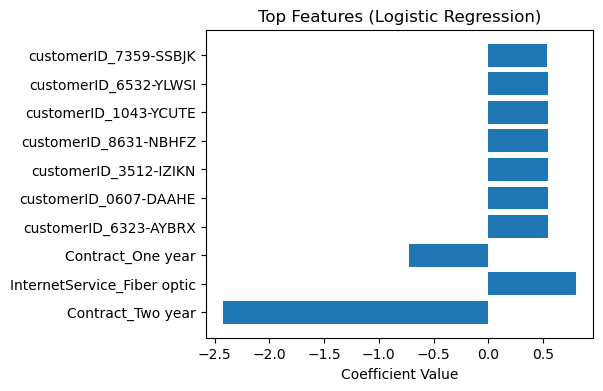

In [28]:
plt.figure(figsize=(5,4))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Top Features (Logistic Regression)")
plt.show()

# Save Model + Deployment

In [29]:
import joblib

In [30]:
joblib.dump(model,"logistic_churn_model.pkl")
print("Model Saved Successfully")

Model Saved Successfully


In [41]:
joblib.dump(X_train.columns.tolist(), "model_features.pkl")
print("Model & features saved successfully!")

Model & features saved successfully!


# Training Side